✅ Accuracy: 0.5
✅ ROC-AUC: 0.53125

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44        24
           1       0.43      0.75      0.55        16

    accuracy                           0.50        40
   macro avg       0.55      0.54      0.49        40
weighted avg       0.57      0.50      0.48        40



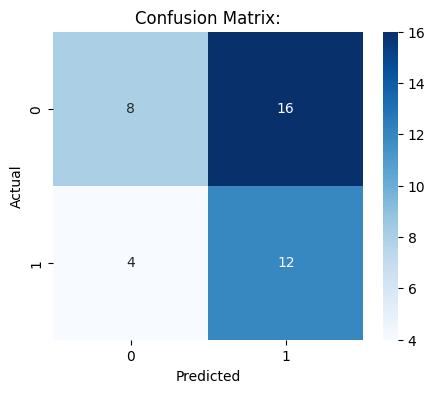

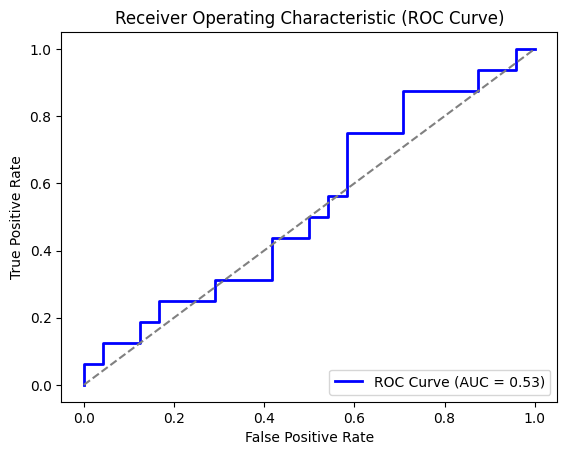


✅ Model Coefficients:
 Age                         0.022909
Area Income                -0.000018
Daily Time Spent on Site   -0.014817
Daily Internet Usage       -0.004031
dtype: float64


In [1]:
# --- IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    roc_curve, auc, confusion_matrix
)

# --- CREATE RANDOM DATASET ---
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 65, 200),
    'Area Income': np.random.normal(60000, 15000, 200),
    'Daily Time Spent on Site': np.random.normal(70, 10, 200),
    'Daily Internet Usage': np.random.normal(180, 30, 200),
    'Clicked on Ad': np.random.choice([0, 1], size=200, p=[0.5, 0.5])
})

# --- FEATURES AND TARGET ---
X = data[['Age', 'Area Income', 'Daily Time Spent on Site', 'Daily Internet Usage']]
y = data['Clicked on Ad']

# --- TRAIN TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- MODEL TRAINING ---
model = LogisticRegression()
model.fit(X_train, y_train)

# --- PREDICTIONS ---
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# --- EVALUATION METRICS ---
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# --- CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix:')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- ROC CURVE ---
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# --- MODEL COEFFICIENTS ---
coef_df = pd.Series(model.coef_[0], index=X.columns)
print("\n✅ Model Coefficients:\n", coef_df)
